<a href="https://colab.research.google.com/github/riyaaaarane/CodeAI_riya/blob/main/3rd-project/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, roc_curve
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

%matplotlib inline

In [ ]:
import json
import warnings
import plotly.express as px
px_template = "simple_white"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df.shape

(253680, 22)

In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 253680 rows and 22 columns.


In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# **Data Visualization**

<Axes: ylabel='Frequency'>

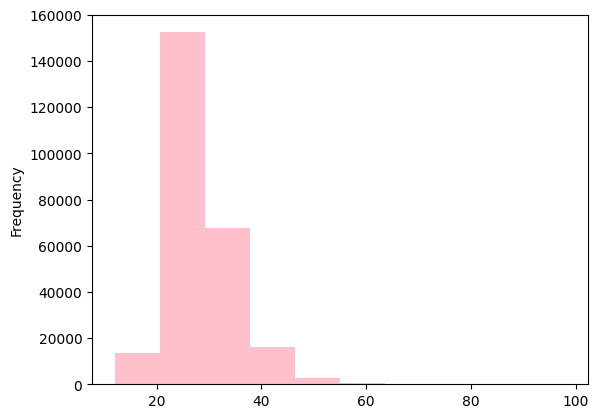

In [ ]:
df['BMI'].plot(kind = 'hist', color = 'pink')

<Axes: ylabel='Frequency'>

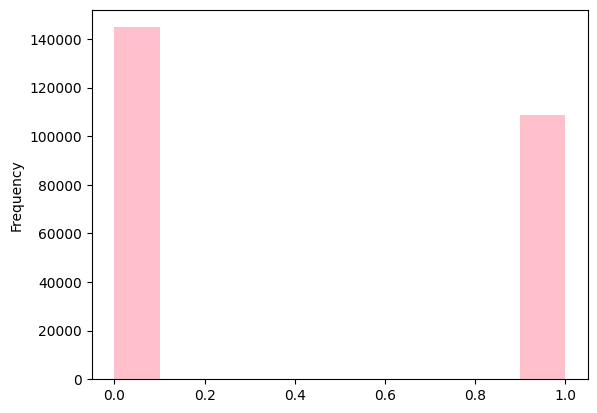

In [28]:
df['HighBP'].plot(kind='hist', color ='pink')

<Axes: ylabel='Frequency'>

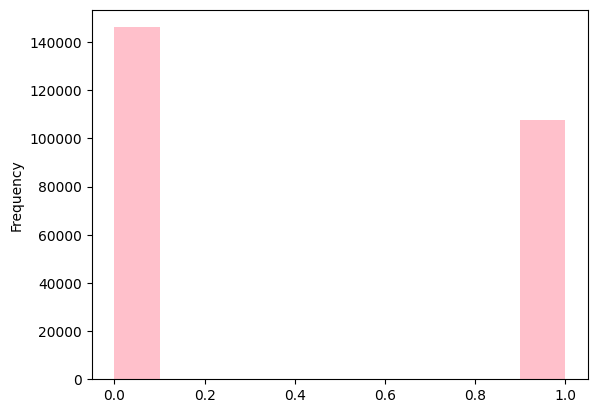

In [26]:
df['HighChol'].plot(kind='hist', color='pink')

<Axes: ylabel='Frequency'>

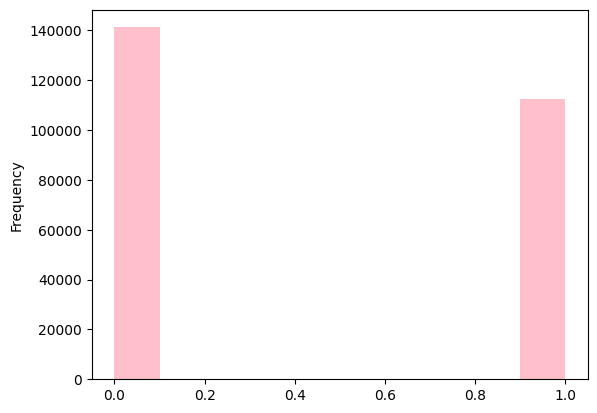

In [27]:
df['Smoker'].plot(kind='hist', color = 'pink')

<Axes: xlabel='Diabetes_012'>

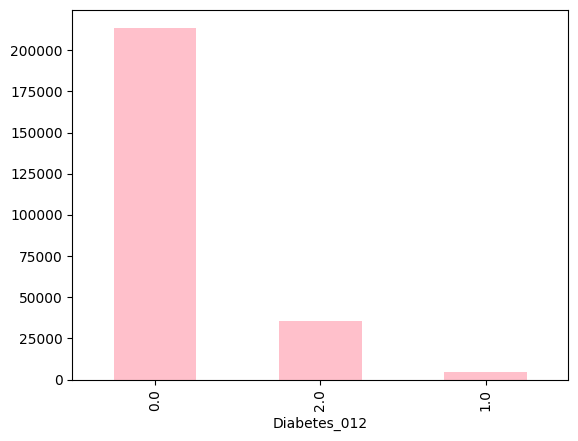

In [29]:
df['Diabetes_012'].value_counts().plot(kind='bar', color='pink')

<Axes: title={'center': 'correlation with diabetes prediction'}>

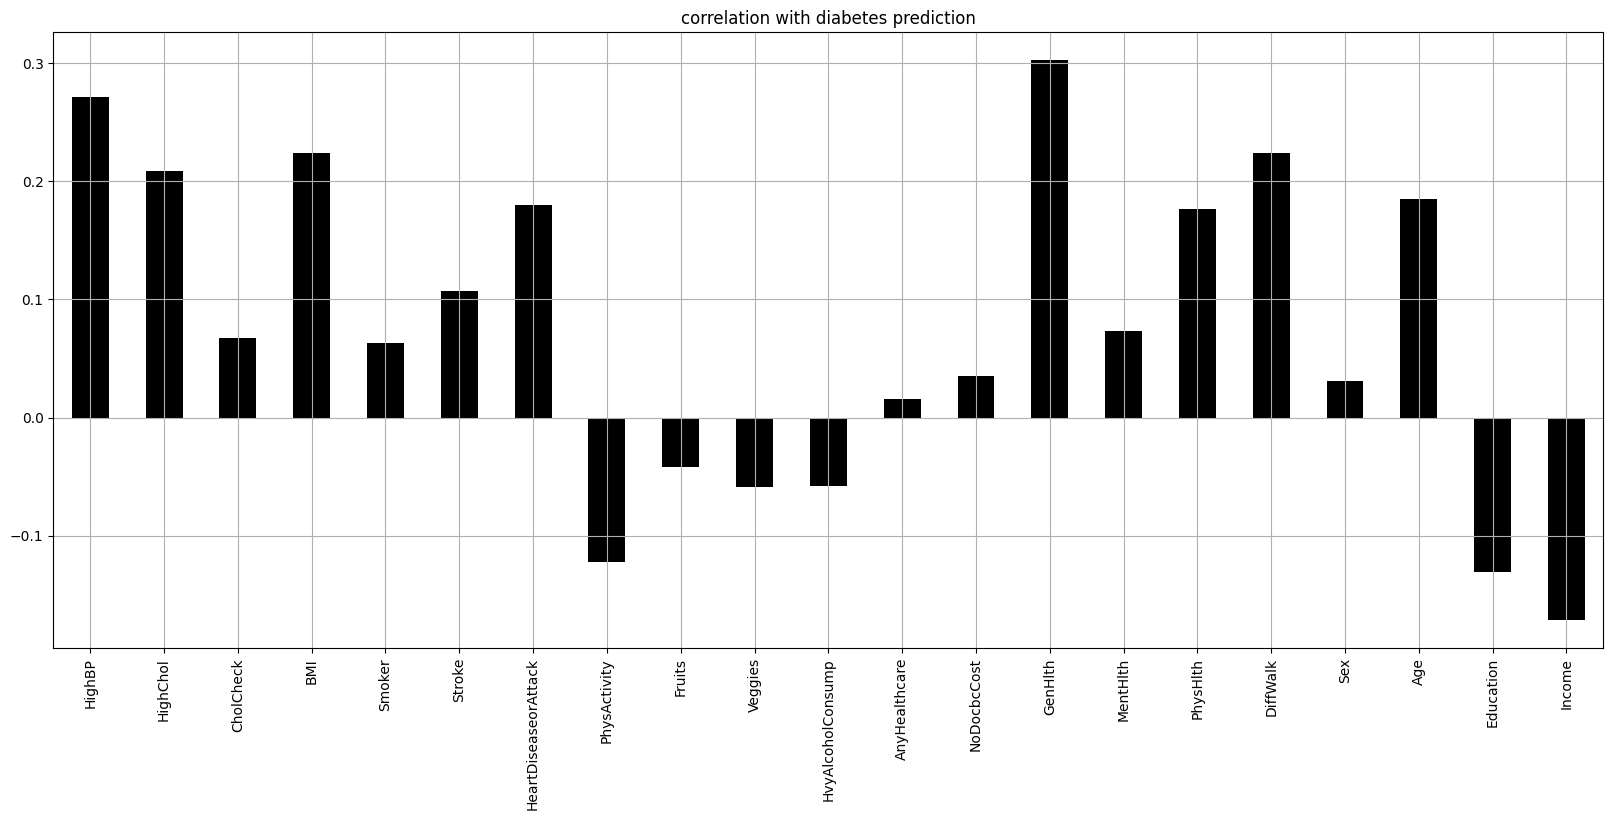

In [30]:
df.drop('Diabetes_012' , axis =1).corrwith(df.Diabetes_012).plot(kind = 'bar', grid = 'true', figsize = (20,8), title = "correlation with diabetes prediction", color ='black')

# Diabetes Prediction

In [12]:
x = df[['BMI', 'HighBP']]
y = df[['Diabetes_012']]

In [13]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#building a model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {conf_matrix}")
print(f"Classification report: \n{classification_rep}")


Accuracy: 0.8410990223904131
Confusion Matrix: [[42486     0   309]
 [  930     0    14]
 [ 6809     0   188]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.37      0.03      0.05      6997

    accuracy                           0.84     50736
   macro avg       0.40      0.34      0.32     50736
weighted avg       0.76      0.84      0.78     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Diabetes Prescriptive

In [ ]:
from sklearn import metrics

In [ ]:
new_bmi = float(input("Enter BMI :"))
new_highbp = int(input("Enter 1 if yes and for no 0 :"))

new_data = scaler.transform([[new_bmi, new_highbp]])

prediction = model.predict(new_data)
if prediction[0] == 1:
   print("person is diabetic")
else :
  print("person is not diabetic")

Enter BMI :10
Enter 1 if yes and for no 0 :1
person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Smoking Prediction

In [19]:
# Define features (X) and target variable (y)
X = df[['Stroke', 'HeartDiseaseorAttack']]
y = df['Smoker']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5804951119520656
Confusion Matrix:
[[25799  2391]
 [18893  3653]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71     28190
         1.0       0.60      0.16      0.26     22546

    accuracy                           0.58     50736
   macro avg       0.59      0.54      0.48     50736
weighted avg       0.59      0.58      0.51     50736



# Prescriptive of smoking

In [22]:
# Now, take user input for new data
new_stroke = float(input("Stroke; if yes 1, no 0: "))
new_heartdis = float(input("Enter 1 if Heart disease or 0 if not: "))

# Make prediction for the new data
new_data = scaler.transform([[new_stroke, new_heartdis]])

# Display the prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The model predicts that the person is a smoker. Try to reduce smoking and seek support if required.")
else:
    print("The model predicts that the person is non smoker. Try to have a healthy diet and regular checups for precaution.")


Stroke; if yes 1, no 0: 1
Enter 1 if Heart disease or 0 if not: 1
The model predicts that the person is a smoker. Try to reduce smoking and seek support if required.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **CORRELATION**

In [ ]:
colums_to_drop = ['Income','Education','DiffWalk','PhysHlth','GenHlth','NoDocbcCost','AnyHealthcare','Fruits','Veggies']
df.drop(columns=colums_to_drop,inplace=True)


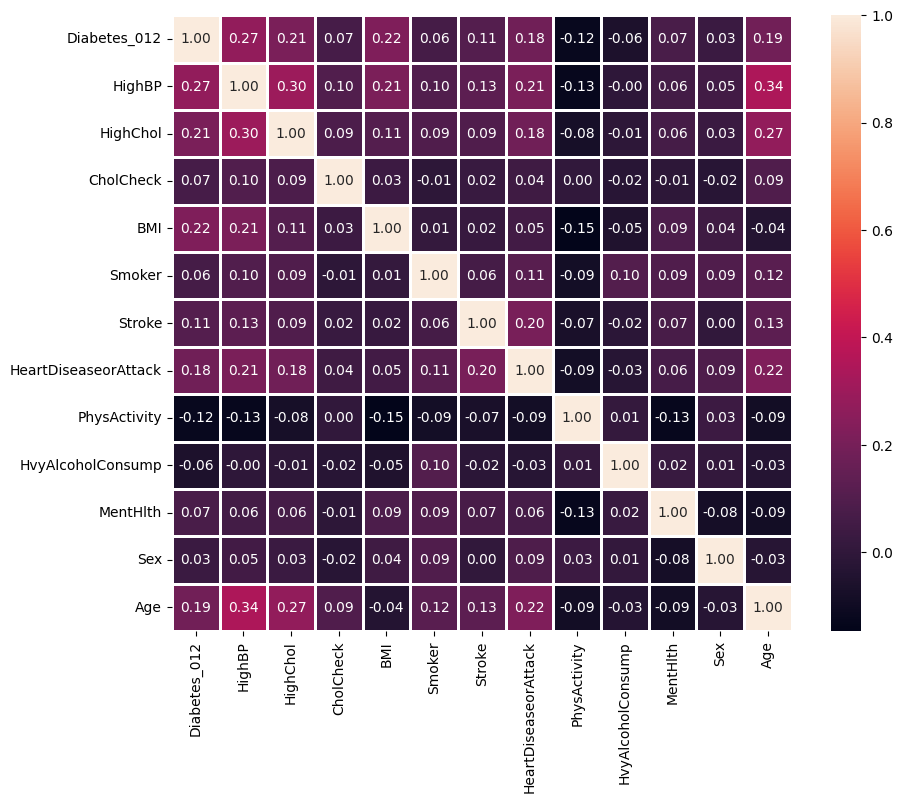

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,annot=True,linewidths = 0.8,fmt='.2f')

# **ROC CURVE**

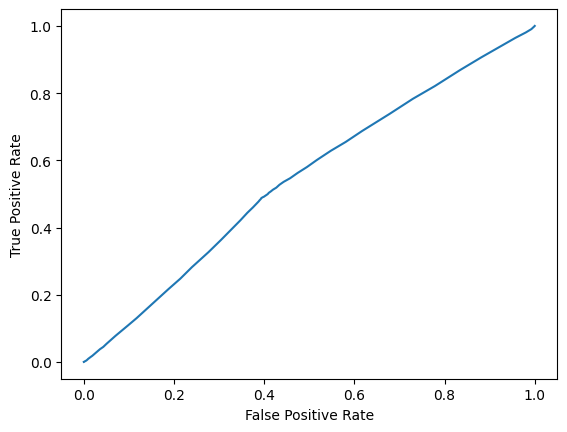

In [23]:
y_pred = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()